In [50]:
import pandas as pd
import csv

In [51]:
df = pd.read_csv('lyrics.csv')

In [52]:
artist = df[df['artist'] == 'blink-182']


In [53]:
artist.head()

index                                    song  year     artist genre  \
305724  305724  the-adventure-angels-and-airwaves-song  2007  blink-182  Rock   
305725  305725                          shit-piss-fuck  2007  blink-182  Rock   
305726  305726                       bullet-in-my-head  2007  blink-182  Rock   
305727  305727                         words-of-wisdom  2007  blink-182  Rock   
305728  305728                                     why  2007  blink-182  Rock   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [54]:
songs = artist.groupby('song').agg({'lyrics': lambda x: " ".join(x), 'year': 'mean'}).reset_index()

In [55]:
pd.options.display.max_colwidth = 5000

In [58]:
songs.head()

,song,lyrics,year
0,13-miles,"13 miles down the road lives a young boy\nHe's got jet black hair and blue-green eyes\nAnd he's mine\nAnd every now and then, he and I\nWould sit together on the porch\nAnd I take off his pants\nAnd I fuck him from behind\nAnd I love him for his heart and soul\nAnd I love his wrinkled scrotum too\nSo if you see us passing by\nOn some dreary rainy day\nTake a look at the young boy\nAnd his naked asshole",2007
1,21-days,"My mind wanders as I'm trying not to fall in love with you\n'Cause every time I awake I ponder on my mistakes of\nWhat I said, it is always my esteem that I sure lose\nPlaying those stupid games as I always end up chasing you\nI can't help myself anymore\nRehearsing my thoughts as I'm too scared to come to your door\nI pushed it all aside just to stand next to you\nBut now you won't talk to me for something that I didn't do\nIt's not gonna work\nAnd I'm trying not to think of you\nI'm all confused as I think of the things that I would do\nI'm all shook up as I get all nervous inside\nMy emotions are something that I will always hide",2006
2,a-letter-to-elise,"Oh Elise, it doesn't matter what you say\nI just can't stay here every yesterday\nLike keep on acting out the same\nThe way we act out every way to smile\nForget and make believe we never needed\nAnymore than this, anymore than this\nOh Elise it doesn't matter what you do\nI know I'll never really get inside of you\nTo make your eyes catch fire the way they should\nThe way the blue could pull me in\nIf they only would, if they only would\nAt least I'd lose this sense of sensing\nSomething else that hides away\nFrom me and you they're worlds to part\nWith aching looks and breaking hearts\nAnd all the prayers your hands can make\nOh, I just take as much as you can throw\nAnd then throw it all away, oh I throw it all away\nLike throwing faces at the sky\nLike throwing arms 'round yesterday\nI stood and stared wide eyed in front of you\nAnd the face I saw looked back the way I wanted to\nBut I just can't hold my tears away the way you do\nElise, believe I never wanted this\nI thought this time I'd keep all of my promises\nI thought you were the girl I always dreamed about\nBut I let the dream go and the promises broke\nAnd the make believe ran out\nSo Elise, it doesn't matter what you say\nI just can't stay here every yesterday\nLike keep on acting out the same\nThe way we act out every way to smile\nForget and make believe we never needed\nAny more than this, any more than this\nAnd every time I try to pick it up like falling sand\nAs fast as I pick it up, it runs away through my clutching hands\nBut there's nothing else I can really do\nThere's nothing else I can really do\nThere's nothing else I can really do at all",2007
3,a-new-hope,"I've got her in my head\nAt night when I go to bed\nAnd I know it sounds lame, but\nShe's the girl of my dreams\nAnd of course I'd do anything for her\nI'd search the moons of Endor\nI'd even walk naked through\nThe deserts of Tatooine\nPrincess Leia, where are you tonight?\nAnd who's laying there by your side?\nEvery night I fall asleep with you\nAnd I wake up alone\nAnd even though I'm not as cool as Han\nI still want to be your man\nYou're exactly the kind of\nAlderranian that I need\nBut when you were available, I was\nDrinking Colt 45's with Lando\nI was hanging out in the cantina\nOn Mos Eisley\nPrincess Leia, where are you tonight?\nAnd who's laying there by your side?\nEvery night I fall asleep with you\nAnd I wake up alone\nPrincess Leia\nPrincess Leia\nPrincess Leia, where are you tonight?\nAnd who's laying there by your side?\nEvery night I fall asleep with you\nAnd I wake up alone",2006
4,a-stranger,Stranger walking to my side\nI cannot wait i cannot hide\nto you its so obvious\nthat im just the average guy\nbut wont you see\nno emotions\nwont even cry,2006


In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [60]:
import nltk
from nltk.corpus import stopwords

In [61]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/rommy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [62]:
stop_words = stopwords.words('english')

In [63]:
stop_words.extend(['back', 'said', 'come', 'things', 'get', 'oh', 'one', 'yeah', 'place', 
                   'would', 'like', 'know', 'stay', 'go', 'let', 'cause', 'fuck', 'wanna', 'time'])

In [64]:
vectorizer = TfidfVectorizer(stop_words = stop_words, min_df = 0.1)

In [65]:
tfidf = vectorizer.fit_transform(songs['lyrics'])

In [66]:
from sklearn.decomposition import NMF

In [67]:
nmf = NMF(n_components = 6)

In [68]:
topic_values = nmf.fit_transform(tfidf)

In [69]:
for topic_num, topic in enumerate(nmf.components_):
    message = "Topic #{}: ".format(topic_num + 1)
    message += " ".join([vectorizer.get_feature_names()[i] for i in topic.argsort()[:-11 :-1]])
    print(message)

Topic #1: wrong life world heart love always right day lost night
Topic #2: home leave alone away guess please hand night much well
Topic #3: inside head tonight always fall need wish night feel every
Topic #4: never fucking shit hate fucked everything hold tell give day
Topic #5: nothing friends please left away wait something think got say
Topic #6: want see way another feel mind hand need say every


In [70]:
topic_labels = ['relationship','distant','abandoned','anger','suicide','miss you']

In [71]:
df_topics = pd.DataFrame(topic_values, columns = topic_labels)
df_topics

,relationship,distant,abandoned,anger,suicide,miss you
0,0.098087,0.000000,0.003220,0.019959,0.016652,0.195147
1,0.054437,0.000000,0.264362,0.000000,0.078686,0.032188
2,0.000000,0.009001,0.045296,0.054930,0.153926,0.207870
3,0.009843,0.089347,0.296448,0.000000,0.000000,0.097517
4,0.000000,0.031423,0.000000,0.000000,0.053396,0.126994
...,...,...,...,...,...,...
196,0.000000,0.000000,0.112140,0.000000,0.175571,0.094777
197,0.049935,0.000000,0.068028,0.025388,0.093644,0.070931
198,0.416163,0.000000,0.000000,0.095067,0.000000,0.000000
199,0.000000,0.000000,0.000000,0.444227,0.024335,0.000000


In [72]:
songs = songs.join(df_topics)

In [73]:
songs.head()

,song,lyrics,year,relationship,distant,abandoned,anger,suicide,miss you
0,13-miles,"13 miles down the road lives a young boy\nHe's got jet black hair and blue-green eyes\nAnd he's mine\nAnd every now and then, he and I\nWould sit together on the porch\nAnd I take off his pants\nAnd I fuck him from behind\nAnd I love him for his heart and soul\nAnd I love his wrinkled scrotum too\nSo if you see us passing by\nOn some dreary rainy day\nTake a look at the young boy\nAnd his naked asshole",2007,0.098087,0.000000,0.003220,0.019959,0.016652,0.195147
1,21-days,"My mind wanders as I'm trying not to fall in love with you\n'Cause every time I awake I ponder on my mistakes of\nWhat I said, it is always my esteem that I sure lose\nPlaying those stupid games as I always end up chasing you\nI can't help myself anymore\nRehearsing my thoughts as I'm too scared to come to your door\nI pushed it all aside just to stand next to you\nBut now you won't talk to me for something that I didn't do\nIt's not gonna work\nAnd I'm trying not to think of you\nI'm all confused as I think of the things that I would do\nI'm all shook up as I get all nervous inside\nMy emotions are something that I will always hide",2006,0.054437,0.000000,0.264362,0.000000,0.078686,0.032188
2,a-letter-to-elise,"Oh Elise, it doesn't matter what you say\nI just can't stay here every yesterday\nLike keep on acting out the same\nThe way we act out every way to smile\nForget and make believe we never needed\nAnymore than this, anymore than this\nOh Elise it doesn't matter what you do\nI know I'll never really get inside of you\nTo make your eyes catch fire the way they should\nThe way the blue could pull me in\nIf they only would, if they only would\nAt least I'd lose this sense of sensing\nSomething else that hides away\nFrom me and you they're worlds to part\nWith aching looks and breaking hearts\nAnd all the prayers your hands can make\nOh, I just take as much as you can throw\nAnd then throw it all away, oh I throw it all away\nLike throwing faces at the sky\nLike throwing arms 'round yesterday\nI stood and stared wide eyed in front of you\nAnd the face I saw looked back the way I wanted to\nBut I just can't hold my tears away the way you do\nElise, believe I never wanted this\nI thought this time I'd keep all of my promises\nI thought you were the girl I always dreamed about\nBut I let the dream go and the promises broke\nAnd the make believe ran out\nSo Elise, it doesn't matter what you say\nI just can't stay here every yesterday\nLike keep on acting out the same\nThe way we act out every way to smile\nForget and make believe we never needed\nAny more than this, any more than this\nAnd every time I try to pick it up like falling sand\nAs fast as I pick it up, it runs away through my clutching hands\nBut there's nothing else I can really do\nThere's nothing else I can really do\nThere's nothing else I can really do at all",2007,0.000000,0.009001,0.045296,0.054930,0.153926,0.207870
3,a-new-hope,"I've got her in my head\nAt night when I go to bed\nAnd I know it sounds lame, but\nShe's the girl of my dreams\nAnd of course I'd do anything for her\nI'd search the moons of Endor\nI'd even walk naked through\nThe deserts of Tatooine\nPrincess Leia, where are you tonight?\nAnd who's laying there by your side?\nEvery night I fall asleep with you\nAnd I wake up alone\nAnd even though I'm not as cool as Han\nI still want to be your man\nYou're exactly the kind of\nAlderranian that I need\nBut when you were available, I was\nDrinking Colt 45's with Lando\nI was hanging out in the cantina\nOn Mos Eisley\nPrincess Leia, where are you tonight?\nAnd who's laying there by your side?\nEvery night I fall asleep with you\nAnd I wake up alone\nPrincess Leia\nPrincess Leia\nPrincess Leia, where are you tonight?\nAnd who's laying there by your side?\nEvery night I fall asleep with you\nAnd I wake up alone",2006,0.009843,0.089347,0.296448,0.000000,0.000000,0.097517
4,a-stranger,Stranger walking to m

In [74]:
songs.loc[songs['relationship'] >= 0.1, 'relationship'] = 1 #find songs in dataframe with values of love, if its greater than 0.1 set score to 1
songs.loc[songs['distant'] >= 0.1, 'distant'] = 1
songs.loc[songs['miss you'] >= 0.1, 'miss you'] = 1
songs.loc[songs['anger'] >= 0.1, 'anger'] = 1
songs.loc[songs['abandoned'] >= 0.1, 'abandoned'] = 1
songs.loc[songs['suicide'] >= 0.1, 'suicide'] = 1

In [75]:
songs.loc[songs['relationship'] < 0.1, 'relationship'] = 0 #find songs in dataframe with values of love, if its greater than 0.1 set score to 1
songs.loc[songs['distant'] < 0.1, 'distant'] = 0
songs.loc[songs['miss you'] < 0.1, 'miss you'] = 0
songs.loc[songs['anger'] < 0.1, 'anger'] = 0
songs.loc[songs['abandoned'] < 0.1, 'abandoned'] = 0
songs.loc[songs['suicide'] < 0.1, 'suicide'] = 0

In [76]:
songs.head()

,song,lyrics,year,relationship,distant,abandoned,anger,suicide,miss you
0,13-miles,"13 miles down the road lives a young boy\nHe's got jet black hair and blue-green eyes\nAnd he's mine\nAnd every now and then, he and I\nWould sit together on the porch\nAnd I take off his pants\nAnd I fuck him from behind\nAnd I love him for his heart and soul\nAnd I love his wrinkled scrotum too\nSo if you see us passing by\nOn some dreary rainy day\nTake a look at the young boy\nAnd his naked asshole",2007,0.0,0.0,0.0,0.0,0.0,1.0
1,21-days,"My mind wanders as I'm trying not to fall in love with you\n'Cause every time I awake I ponder on my mistakes of\nWhat I said, it is always my esteem that I sure lose\nPlaying those stupid games as I always end up chasing you\nI can't help myself anymore\nRehearsing my thoughts as I'm too scared to come to your door\nI pushed it all aside just to stand next to you\nBut now you won't talk to me for something that I didn't do\nIt's not gonna work\nAnd I'm trying not to think of you\nI'm all confused as I think of the things that I would do\nI'm all shook up as I get all nervous inside\nMy emotions are something that I will always hide",2006,0.0,0.0,1.0,0.0,0.0,0.0
2,a-letter-to-elise,"Oh Elise, it doesn't matter what you say\nI just can't stay here every yesterday\nLike keep on acting out the same\nThe way we act out every way to smile\nForget and make believe we never needed\nAnymore than this, anymore than this\nOh Elise it doesn't matter what you do\nI know I'll never really get inside of you\nTo make your eyes catch fire the way they should\nThe way the blue could pull me in\nIf they only would, if they only would\nAt least I'd lose this sense of sensing\nSomething else that hides away\nFrom me and you they're worlds to part\nWith aching looks and breaking hearts\nAnd all the prayers your hands can make\nOh, I just take as much as you can throw\nAnd then throw it all away, oh I throw it all away\nLike throwing faces at the sky\nLike throwing arms 'round yesterday\nI stood and stared wide eyed in front of you\nAnd the face I saw looked back the way I wanted to\nBut I just can't hold my tears away the way you do\nElise, believe I never wanted this\nI thought this time I'd keep all of my promises\nI thought you were the girl I always dreamed about\nBut I let the dream go and the promises broke\nAnd the make believe ran out\nSo Elise, it doesn't matter what you say\nI just can't stay here every yesterday\nLike keep on acting out the same\nThe way we act out every way to smile\nForget and make believe we never needed\nAny more than this, any more than this\nAnd every time I try to pick it up like falling sand\nAs fast as I pick it up, it runs away through my clutching hands\nBut there's nothing else I can really do\nThere's nothing else I can really do\nThere's nothing else I can really do at all",2007,0.0,0.0,0.0,0.0,1.0,1.0
3,a-new-hope,"I've got her in my head\nAt night when I go to bed\nAnd I know it sounds lame, but\nShe's the girl of my dreams\nAnd of course I'd do anything for her\nI'd search the moons of Endor\nI'd even walk naked through\nThe deserts of Tatooine\nPrincess Leia, where are you tonight?\nAnd who's laying there by your side?\nEvery night I fall asleep with you\nAnd I wake up alone\nAnd even though I'm not as cool as Han\nI still want to be your man\nYou're exactly the kind of\nAlderranian that I need\nBut when you were available, I was\nDrinking Colt 45's with Lando\nI was hanging out in the cantina\nOn Mos Eisley\nPrincess Leia, where are you tonight?\nAnd who's laying there by your side?\nEvery night I fall asleep with you\nAnd I wake up alone\nPrincess Leia\nPrincess Leia\nPrincess Leia, where are you tonight?\nAnd who's laying there by your side?\nEvery night I fall asleep with you\nAnd I wake up alone",2006,0.0,0.0,1.0,0.0,0.0,0.0
4,a-stranger,Stranger walking to my side\nI cannot wait i cannot hide\nto you its so obvious\nthat im just the average guy\nbut wont you see\nno emotions\

In [77]:
year_topics = songs.groupby('year').sum().reset_index()

In [78]:
year_topics

,year,relationship,distant,abandoned,anger,suicide,miss you
0,2000,2.0,5.0,2.0,5.0,10.0,5.0
1,2006,13.0,18.0,17.0,24.0,34.0,39.0
2,2007,7.0,11.0,9.0,7.0,10.0,13.0
3,2008,0.0,0.0,0.0,1.0,0.0,1.0
4,2011,4.0,5.0,6.0,5.0,3.0,3.0
5,2012,2.0,1.0,2.0,0.0,4.0,1.0
6,2016,6.0,3.0,5.0,3.0,8.0,7.0


In [79]:
import matplotlib.pyplot as plt

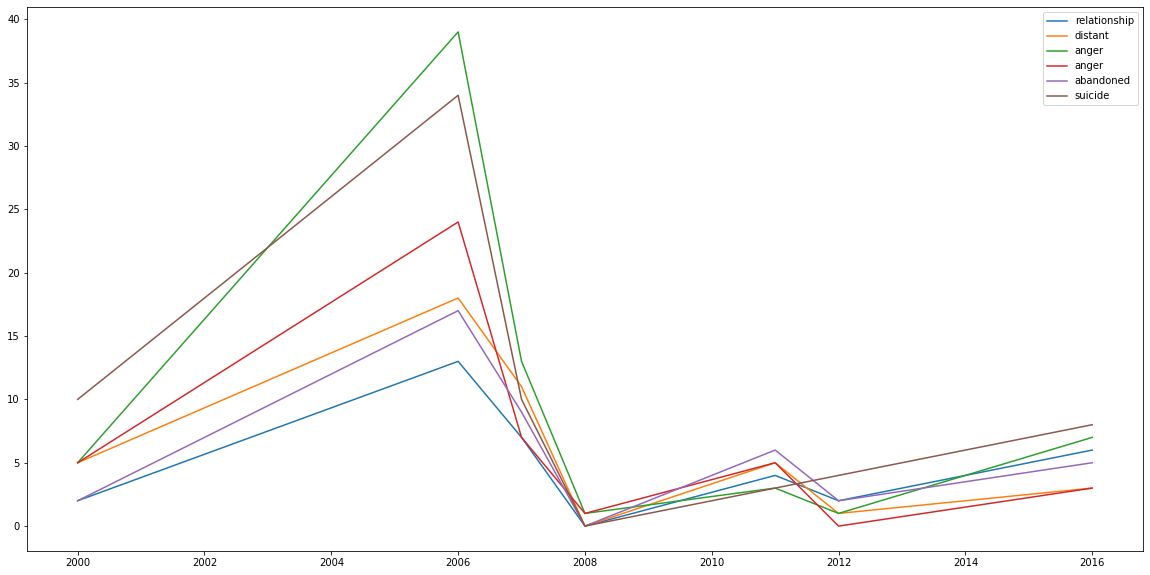

In [80]:
plt.figure(figsize=(20,10))
plt.plot(year_topics['year'], year_topics['relationship'],label = 'relationship')
plt.plot(year_topics['year'], year_topics['distant'],label = 'distant')
plt.plot(year_topics['year'], year_topics['miss you'],label = 'anger')
plt.plot(year_topics['year'], year_topics['anger'],label = 'anger')
plt.plot(year_topics['year'], year_topics['abandoned'],label = 'abandoned')
plt.plot(year_topics['year'], year_topics['suicide'],label = 'suicide')
plt.legend()